Part 1: A Discrete Convolution Program

Write a discrete convolution function myConv that convolves two arrays { fi, i = 0, . . . , Nf − 1} and {wj, j = 0, . . . , Nw −1} to obtain an output time series {gn}. For simplicity, assume a fixed sampling interval Δ = 1, and further, that f and w are 0 outside of their sampled regions.

1. How long is {gn}? In other words, how many non-zero points can it have? Justify your answer.

2. Please copy and paste your function g = myConv(f, w) to the PDF report.

3. Provide a test to convince yourself (and me) that your function agrees with numpy.convolve.For example, generate two random timeseries f , w with Nf = 50, Nw = 100, drawing each element from U[0, 1], and plot the difference between your function’s output and numpy’s. Include the code for your test in the PDF report.

4. Compare the speed of your myConv function to the NumPy function. Provide a plot of the comparison, and include your python code in the PDF report. Is your function faster or slower than the NumPy function? Can you suggest why that is the case?

In [320]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#question 1.2

#step 1: flip w[-k]
#step 2: shift w[n-k]
#step 3: multiply f[k]w[n-k]
#step 4: sum f[k]w[n-k] and append to g[n]
#step 5: repeart step 2-4

def myconv(f,w):
    """input:two one dimensional arrays, f and w
        Output: convolution of f and w """
    N_f=len(f)
    N_w=len(w)
    g=np.zeros(N_f + N_w - 1, dtype=int)
    for i in range(N_f + N_w-1):
        for j in range(N_w):
            if (i-j >= 0 and i-j < N_f):
                g[i]+=(f[i-j]*w[j])*Δ
    print(g)

# #testing myconv and numpy.conv
# f=[1,2,4,11]
# w=[0,3,8,5]
# Δ=1

# #my function
# myconv(f,w) 
# #numpy function
# g_np=np.convolve(f,w)*Δ
# print(g_np)

[ 0.19682261  0.17769058  0.87987259  1.07751395  1.40281669  1.48282911
  2.33177052  3.06519468  2.94725247  3.47045748  4.04901325  4.37076807
  5.01109444  4.50121562  5.1448584   4.94105868  5.4423013   5.383295
  4.90215019  6.34249356  6.09752234  6.56947885  5.81543299  8.1064353
  7.33444324  8.71115018  8.40520522  9.50759797  9.32722258  9.43613018
 11.32805767  9.40293144 10.54670352 10.15950053 11.58032525  9.93989957
 10.72976602 11.13107442 11.33943287 11.74245345 11.09652578 11.78949011
 11.69314908 12.93500738 13.25855023 12.88635463 12.88438    14.25908902
 13.48011646 13.48595267 13.31396947 12.93482608 12.97488232 13.77265842
 13.49554771 12.23131769 12.6345021  13.0580119  13.68314675 12.93206799
 13.40449682 14.41951038 13.64755122 12.83436493 13.36670995 12.32845693
 12.9627742  11.78792365 11.30137425 11.71373802 11.2373764  11.99590987
 11.38244494 11.59178988 10.88839542 11.85871497 11.36874644 11.34863215
 10.59067648 11.73647021 11.3585687  12.22238307 11.78

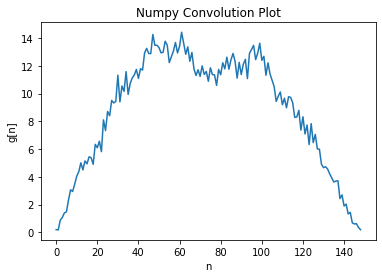

[ 0.19682261  0.17769058  0.87987259  1.07751395  1.40281669  1.48282911
  2.33177052  3.06519468  2.94725247  3.47045748  4.04901325  4.37076807
  5.01109444  4.50121562  5.1448584   4.94105868  5.4423013   5.383295
  4.90215019  6.34249356  6.09752234  6.56947885  5.81543299  8.1064353
  7.33444324  8.71115018  8.40520522  9.50759797  9.32722258  9.43613018
 11.32805767  9.40293144 10.54670352 10.15950053 11.58032525  9.93989957
 10.72976602 11.13107442 11.33943287 11.74245345 11.09652578 11.78949011
 11.69314908 12.93500738 13.25855023 12.88635463 12.88438    14.25908902
 13.48011646 13.48595267 13.31396947 12.93482608 12.97488232 13.77265842
 13.49554771 12.23131769 12.6345021  13.0580119  13.68314675 12.93206799
 13.40449682 14.41951038 13.64755122 12.83436493 13.36670995 12.32845693
 12.9627742  11.78792365 11.30137425 11.71373802 11.2373764  11.99590987
 11.38244494 11.59178988 10.88839542 11.85871497 11.36874644 11.34863215
 10.59067648 11.73647021 11.3585687  12.22238307 11.78

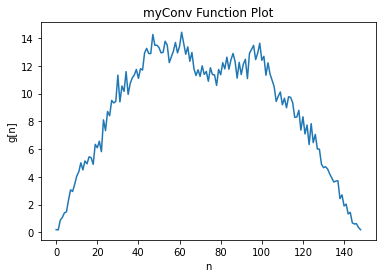

In [321]:
#question 1.3
import random
import time

N_f=50
N_w=100
f=[]
for i in range(0,N_f):
    n=random.random() #default is between 0 and 1
    f.append(n)
#print(f)
w=[]
for j in range(0,N_w):
    m=random.random()
    w.append(m)
#print(w)

Δ=1
#numpys function random number test
g=np.convolve(f,w)*Δ
print(g)

#plot of numpy convolution
plt.figure(1)
plt.plot(g)
plt.title("Numpy Convolution Plot")
plt.ylabel("g[n]")
plt.xlabel("n")
plt.show()

#myConv(f,w) function random number test
g2=myConv(f,w)*Δ
print(g2)

#plot of myConv
plt.figure(2)
plt.plot(g2)
plt.title("myConv Function Plot")
plt.ylabel("g[n]")
plt.xlabel("n")
plt.show()
    

In [322]:
#question 1.4

#timing the numpy convolution vs. myConv 
N=[10,100,1000,10000]
t_np=[]
t_mc=[]
for i in N:
    f=random.sample(range(0,100000),i)
    w=random.sample(range(0,100000),i)
    
     #timing numpy convolution
    Δ=1
    t1=time.time()
    g=np.convolve(f,w)*Δ
    #print(g)
    t2=time.time()
    t=(t2-t1)
    t_np.append(t)
    print(t_np)
    
    #timing myConv
    t3=time.time()
    g1=myConv(f,w)*Δ
    #print(g1)
    t4=time.time()
    t=(t4-t3)
    t_mc.append(t)
    print(t_mc)




[0.0]
[0.0060002803802490234]
[0.0, 0.0]
[0.0060002803802490234, 0.019001245498657227]
[0.0, 0.0, 0.012000799179077148]
[0.0060002803802490234, 0.019001245498657227, 1.8181040287017822]
[0.0, 0.0, 0.012000799179077148, 0.0870051383972168]
[0.0060002803802490234, 0.019001245498657227, 1.8181040287017822, 185.3830726146698]


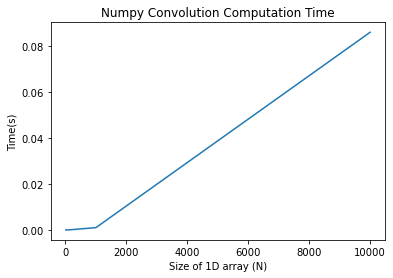

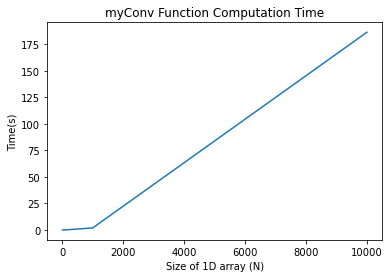

In [323]:
#time trial plot for numpy convolution

t_np=(0.0, 0.0, 0.0010001659393310547, 0.08600497245788574)
plt.figure(3)
plt.plot(N,t_np)
plt.title("Numpy Convolution Computation Time")
plt.xlabel("Size of 1D array (N)")
plt.ylabel("Time(s)")
plt.show()

#time trial plot for my function convolution
t_mc=(0.0, 0.017000913619995117, 1.8611063957214355, 186.39104866981506)
plt.figure(4)
plt.plot(N,t_mc)
plt.title("myConv Function Computation Time")
plt.xlabel("Size of 1D array (N)")
plt.ylabel("Time(s)")
plt.show()

Part 2: Simple Physical System: RL Circuit Response

Consider a simple physical system consisting of a resistor (with resistance R) and an inductor (with inductance L) in series. We apply an input voltage a(t) across the pair in series, and measure the output voltage b(t) across the inductor alone.

2. Discretize the impulse response R(t) function, realizing that H(t) should be discretized as H = [0.5, 1, 1, . . . ], and δ(t) should be discretized as D = [1/dt, 0, 0, . . . ]. Take advantage of your myConv function, or the NumPy built-in function convolve, and write your own Python function V_out = RLresponse(R,L,V_in,dt) to take an input series Vin sampled at Δ = dt, and calculate the output series Vout sampled by the same dt. 

3. Using R = 975Ω, L = 5H, and sampling period dt = 0.20 ms, test your RL-response function with {Hn} series (discretized H(t)) as input, and plot the output time series (as circles) on top of the theoretical curve S(t) given by part 1 (as a solid line). Repeat this for {Dn} (discretized δ(t)) and R(t). Make the time range of the plots 0 to at least 20 ms. 

In [429]:
#question 2.2

def Heaviside(N,dt):
    H=np.ones(N)
    H[0]=0.5
    return H

def Delta(N,dt):
    D=np.zeros(N)
    D[0]=1/dt
    return D

def RLresponse(R,L,V_in,dt):
    N=len(V_in)
    t=np.arange(0,N*dt, dt)#time(s)
    H=Heaviside(N,dt) #Heaviside function
    D=Delta(N,dt) #delta function
    Rt= D - R/L*np.exp(-R*t/L)*H
    V_out=np.convolve(V_in, Rt, mode='full')*dt
    return V_out[:N]


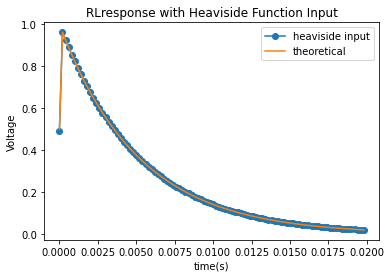

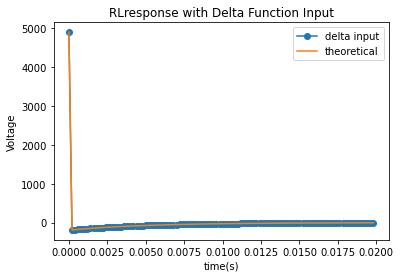

In [430]:
#question 2.3
from scipy import signal
N=100
dt=0.20e-3
t=np.arange(0,N*dt,dt)
R=975 #in Ohms
L=5 #in Henries
H=0.5*(np.sign(t)+1)#Heaviside step function

Vout=RLresponse(R,L,Ht,dt) #Heaviside function as input
plt.figure()
plt.title('RLresponse with Heaviside Function Input')
plt.xlabel('time(s)')
plt.ylabel('Voltage')
plt.plot(t,Vout,label='heaviside input', marker='o')
S=np.e**(-(R*t)/L)*H #theoretical curve S(t)
plt.plot(t,S, label='theoretical')
plt.legend()
plt.show()

D=signal.unit_impulse(N)*1/dt #delta function
Vout2=RLresponse(R,L,D,dt) #delta function as input
plt.figure()
plt.title('RLresponse with Delta Function Input')
plt.xlabel('time(s)')
plt.ylabel('Voltage')
plt.plot(t,Vout2, label='delta input', marker='o')
R_t=D-R/L*np.exp(-R*t/L)*H #theoretical curve for R(t)
plt.plot(t,R_t, label='theoretical')
plt.legend()
plt.show()

Part 3: Convolution of a Near-infrared Spectrum (6 pts)

The Total Carbon Column Observing Network (TCCON) is a network of ground-based Fourier transform spectrometers that measure in the near-infrared region (NIR) of the spectrum. These are high spectral resolution instruments that measure the absorption signatures in the NIR of various
atmospheric gases. As a result of the high resolution of these instruments, we are able to use the absorption signatures to infer the atmospheric abundance of gases such as CO2, CH4, and H2O. The file FTIR_ETL_TCCON.asc contains measurements from a Fourier transform spectrometer at East Trout Lake, Saskatchewan. These are measurements that were made by Prof. Debra Wunch’s group on 20 April 2017. (The file contains the spectrum as a function of wavenumbers ˜ν= 1/λ in units of cm−1). One way of simulating the spectrum that might be measured by a low-resolution instrument is by convolving the high-resolution spectrum with the function 2Δ sin(2π˜νΔ)/(2π˜νΔ), where Δ is a measure of the spectral resolution.

1. Plot the spectrum at East Trout Lake as a function of wavenumbers.
2. Plot the function 2Δ sin(2π˜ν Δ)/(2π˜ν Δ) over the interval ˜ν = [−4, 4], with Δ˜ν = 0.007533 cm−1, for values of Δ = 1 and Δ = 4.
3. Use numpy’s convolve function to convolve the high-resolution spectrum in the file FTIR_ETL_TCCON.asc separately with the two curves in Part 2 (i.e., for Δ = 1 and Δ = 4).
4. For each of the two cases, plot the original and convolved time series over the wavenumber range [4000, 4050]. Comment on the differences in the convolved time series between the two cases.

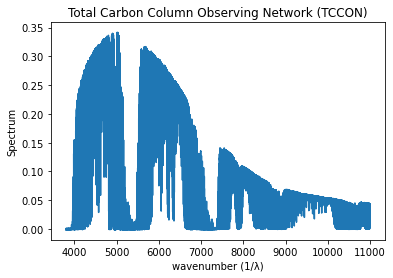

In [397]:
#question 3.1

wn,signal= np.loadtxt("C:/Users/BMCQ/Desktop/PHY408 Time Series Analysis/FTIR_ETL_TCCON.asc", skiprows=2, unpack=True)
plt.figure(5)
plt.plot(wn,signal)
plt.title("Total Carbon Column Observing Network (TCCON)")
plt.xlabel("wavenumber (1/λ)")
plt.ylabel("Spectrum")
plt.show()

# print(len(wn))
# print(max(wn))
# print(min(wn))

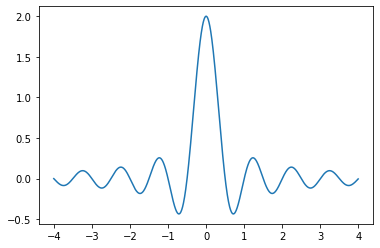

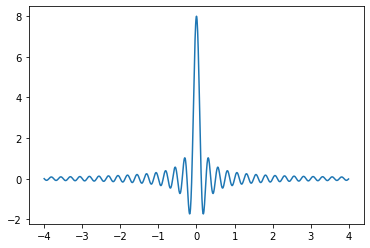

In [195]:
#question 3.2

Δ=1
v=np.arange(-4,4,0.007533)
f1=2*Δ*np.sin(2*np.pi*v*Δ)/(2*np.pi*v*Δ)
plt.figure()
plt.plot(v, f1)
plt.show()

Δ=4
f4=2*Δ*np.sin(2*np.pi*v*Δ)/(2*np.pi*v*Δ)
plt.figure()
plt.plot(v,f4)
plt.show()

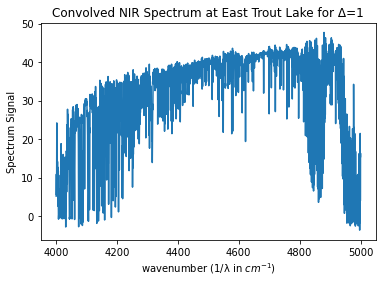

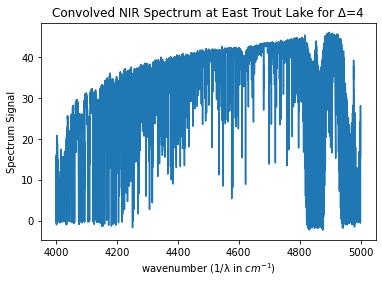

In [191]:
#question 3.3

#convolution of signal and f1/f4

g1=np.convolve(signal, f1, mode='same')
plt.figure(8)
plt.plot(wn,g1)
plt.title("Convolved NIR Spectrum at East Trout Lake for Δ=1")
plt.xlabel("wavenumber (1/λ in $cm^{-1}$)")
plt.ylabel("Spectrum Signal")
plt.show()

g2=np.convolve(signal,f4, mode='same')
plt.figure(9)
plt.plot(wn,g2)
plt.title("Convolved NIR Spectrum at East Trout Lake for Δ=4")
plt.xlabel("wavenumber (1/λ in $cm^{-1}$)")
plt.ylabel("Spectrum Signal")
plt.show()

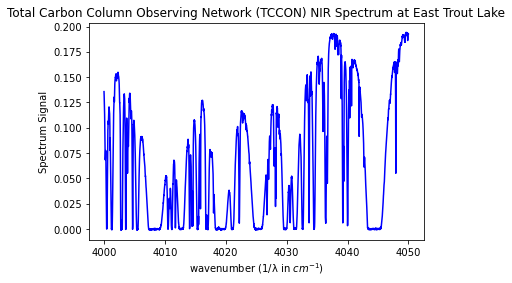

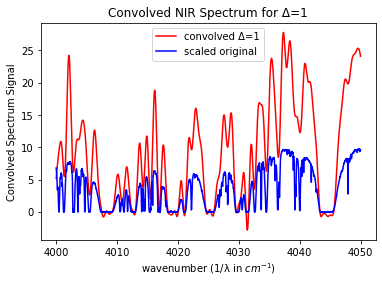

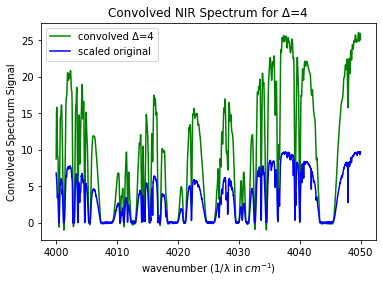

In [192]:
#question 3.4

range_4000_4050=(wn<4050)* (wn>4000)

#plot of original time series, and two convolved signal plots
plt.figure(10)
plt.plot(wn[range_4000_4050],signal[range_4000_4050], color='b')
plt.title("Total Carbon Column Observing Network (TCCON) NIR Spectrum at East Trout Lake")
plt.xlabel("wavenumber (1/λ in $cm^{-1}$)")
plt.ylabel("Spectrum Signal")
plt.show()

g=np.convolve(signal,f1, mode='same')
plt.figure(11)
plt.plot(wn[range_4000_4050],g[range_4000_4050], color='r', label='convolved Δ=1')
plt.plot(wn[range_4000_4050],50*signal[range_4000_4050], color='b', label='scaled original')
plt.legend()
plt.title('Convolved NIR Spectrum for Δ=1')
plt.xlabel("wavenumber (1/λ in $cm^{-1}$)")
plt.ylabel("Convolved Spectrum Signal")
plt.show()

g2=np.convolve(signal, f4, mode='same')
plt.figure(12)
plt.plot(wn[range_4000_4050],g2[range_4000_4050], color='g', label='convolved Δ=4')
plt.plot(wn[range_4000_4050],50*signal[range_4000_4050], color='b', label='scaled original')
plt.legend()
plt.title('Convolved NIR Spectrum for Δ=4')
plt.xlabel("wavenumber (1/λ in $cm^{-1}$)")
plt.ylabel("Convolved Spectrum Signal")
plt.show()